# **Original Data**

In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("/content/symtoms_df.csv")

df.head()

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [15]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

**Using one hot encoder to extract the symptoms out**

In [16]:
df_melted = df.melt(id_vars = ['Disease'], value_vars = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4'],
                    var_name='Sympton_number', value_name = 'Symptom')

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Encode the 'Symptom' column
encode_symptoms = encoder.fit_transform(df_melted[['Symptom']])

# Convert the encoded symptoms to a DataFrame
encoded_symptoms_df = pd.DataFrame(encode_symptoms, columns=encoder.get_feature_names_out(['Symptom']))

# Concatenate the encoded symptoms DataFrame with the original DataFrame containing the 'Disease' column
result_df = pd.concat([df_melted[['Disease']], encoded_symptoms_df], axis=1)

# Rename 'Disease' to 'Prognosis'
result_df.rename(columns={'Disease': 'prognosis'}, inplace=True)

# Remove the prefix 'Symptom_' from symptom columns
result_df.columns = [col.replace('Symptom_', '') for col in result_df.columns]

# Remove the 'nan' column if it exists
if 'nan' in result_df.columns:
    result_df.drop(columns='nan', inplace=True)

# Save the preprocessed data to a CSV file
result_df.to_csv("CleanData.csv", index=False)

# Display the head of the preprocessed DataFrame
result_df.head()


,prognosis,abdominal_pain,acidity,altered_sensorium,anxiety,back_pain,blackheads,bladder_discomfort,blister,bloody_stool,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellowing_of_eyes,yellowish_skin,itching
0,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Fungal infection,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
result_df.columns

Index(['prognosis', ' abdominal_pain', ' acidity', ' altered_sensorium',
       ' anxiety', ' back_pain', ' blackheads', ' bladder_discomfort',
       ' blister', ' bloody_stool', ' blurred_and_distorted_vision',
       ' breathlessness', ' bruising', ' burning_micturition', ' chest_pain',
       ' chills', ' cold_hands_and_feets', ' constipation',
       ' continuous_feel_of_urine', ' continuous_sneezing', ' cough',
       ' cramps', ' dark_urine', ' dehydration', ' diarrhoea',
       ' dischromic _patches', ' distention_of_abdomen', ' dizziness',
       ' excessive_hunger', ' extra_marital_contacts', ' family_history',
       ' fatigue', ' foul_smell_of urine', ' headache', ' high_fever',
       ' hip_joint_pain', ' indigestion', ' irregular_sugar_level',
       ' irritation_in_anus', ' joint_pain', ' knee_pain',
       ' lack_of_concentration', ' lethargy', ' loss_of_appetite',
       ' loss_of_balance', ' mood_swings', ' movement_stiffness',
       ' muscle_wasting', ' muscle_weakn

In [19]:
result_df['prognosis'].value_counts()

prognosis
Fungal infection                           480
Hepatitis C                                480
Hepatitis E                                480
Alcoholic hepatitis                        480
Tuberculosis                               480
Common Cold                                480
Pneumonia                                  480
Dimorphic hemmorhoids(piles)               480
Heart attack                               480
Varicose veins                             480
Hypothyroidism                             480
Hyperthyroidism                            480
Hypoglycemia                               480
Osteoarthristis                            480
Arthritis                                  480
(vertigo) Paroymsal  Positional Vertigo    480
Acne                                       480
Urinary tract infection                    480
Psoriasis                                  480
Hepatitis D                                480
Hepatitis B                                480
All

<ipython-input-20-20e774dd55a7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Disease', data=disease_counts_df, palette='viridis')


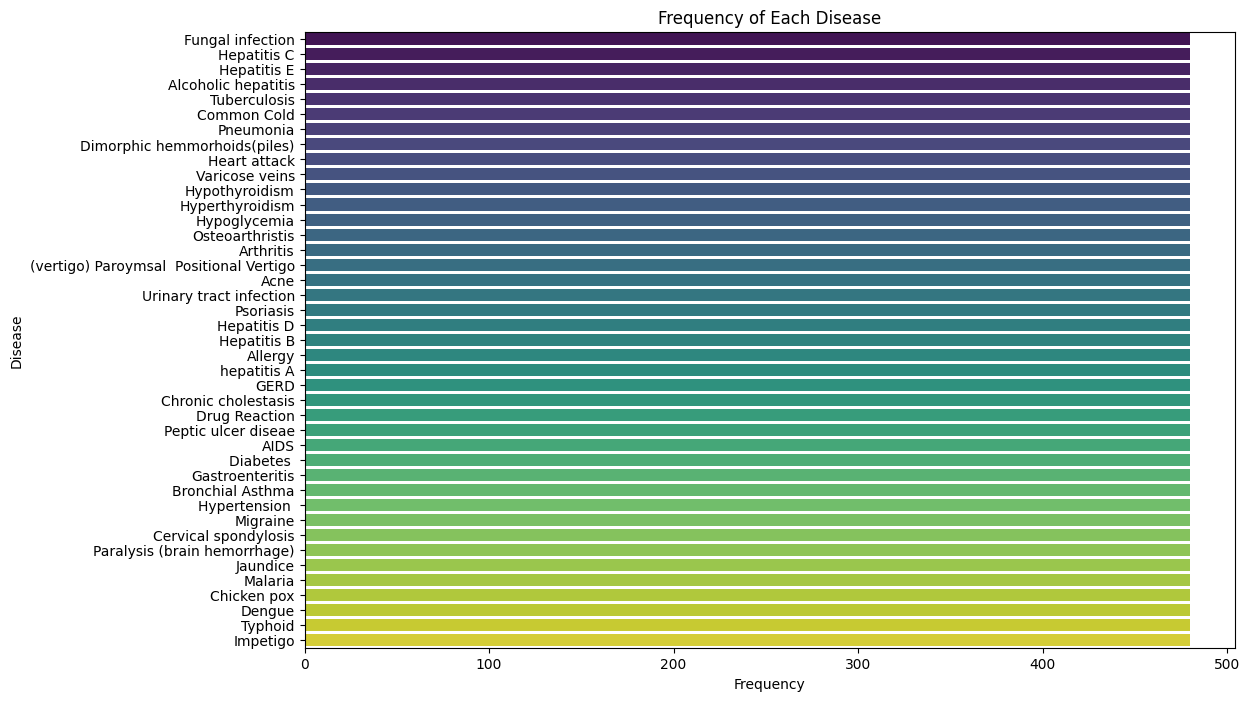

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df1 and the target column is 'prognosis'
disease_counts = result_df['prognosis'].value_counts()

# Convert to DataFrame for easier plotting
disease_counts_df = disease_counts.reset_index()
disease_counts_df.columns = ['Disease', 'Frequency']

# Plotting the frequency of each disease
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Disease', data=disease_counts_df, palette='viridis')
plt.title('Frequency of Each Disease')
plt.xlabel('Frequency')
plt.ylabel('Disease')
plt.show()


In [21]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the encoder
encoder = OneHotEncoder(sparse_output=False, categories='auto')

# Fit and transform the 'prognosis' column
y_encoder = encoder.fit_transform(result_df[['prognosis']])

X = result_df.drop('prognosis', axis = 1)

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y_encoder, test_size = 0.2, random_state = 42)

print(f"X_train = {X_train.shape}")
print(f"X_test = {X_test.shape}")
print(f"y_train = {y_train.shape}")
print(f"y_test = {y_test.shape}")

X_train = (15744, 86)
X_test = (3936, 86)
y_train = (15744, 41)
y_test = (3936, 41)


**Testing the original data with some model**

Classification Report
{'0': {'precision': 1.0, 'recall': 0.27956989247311825, 'f1-score': 0.43697478991596633, 'support': 93}, '1': {'precision': 1.0, 'recall': 0.7333333333333333, 'f1-score': 0.846153846153846, 'support': 105}, '2': {'precision': 1.0, 'recall': 0.6770833333333334, 'f1-score': 0.8074534161490683, 'support': 96}, '3': {'precision': 0.625, 'recall': 0.5050505050505051, 'f1-score': 0.5586592178770949, 'support': 99}, '4': {'precision': 1.0, 'recall': 0.44047619047619047, 'f1-score': 0.6115702479338843, 'support': 84}, '5': {'precision': 0.9459459459459459, 'recall': 1.0, 'f1-score': 0.9722222222222222, 'support': 105}, '6': {'precision': 1.0, 'recall': 0.056818181818181816, 'f1-score': 0.1075268817204301, 'support': 88}, '7': {'precision': 0.6616541353383458, 'recall': 0.9263157894736842, 'f1-score': 0.7719298245614035, 'support': 95}, '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 98}, '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support':

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


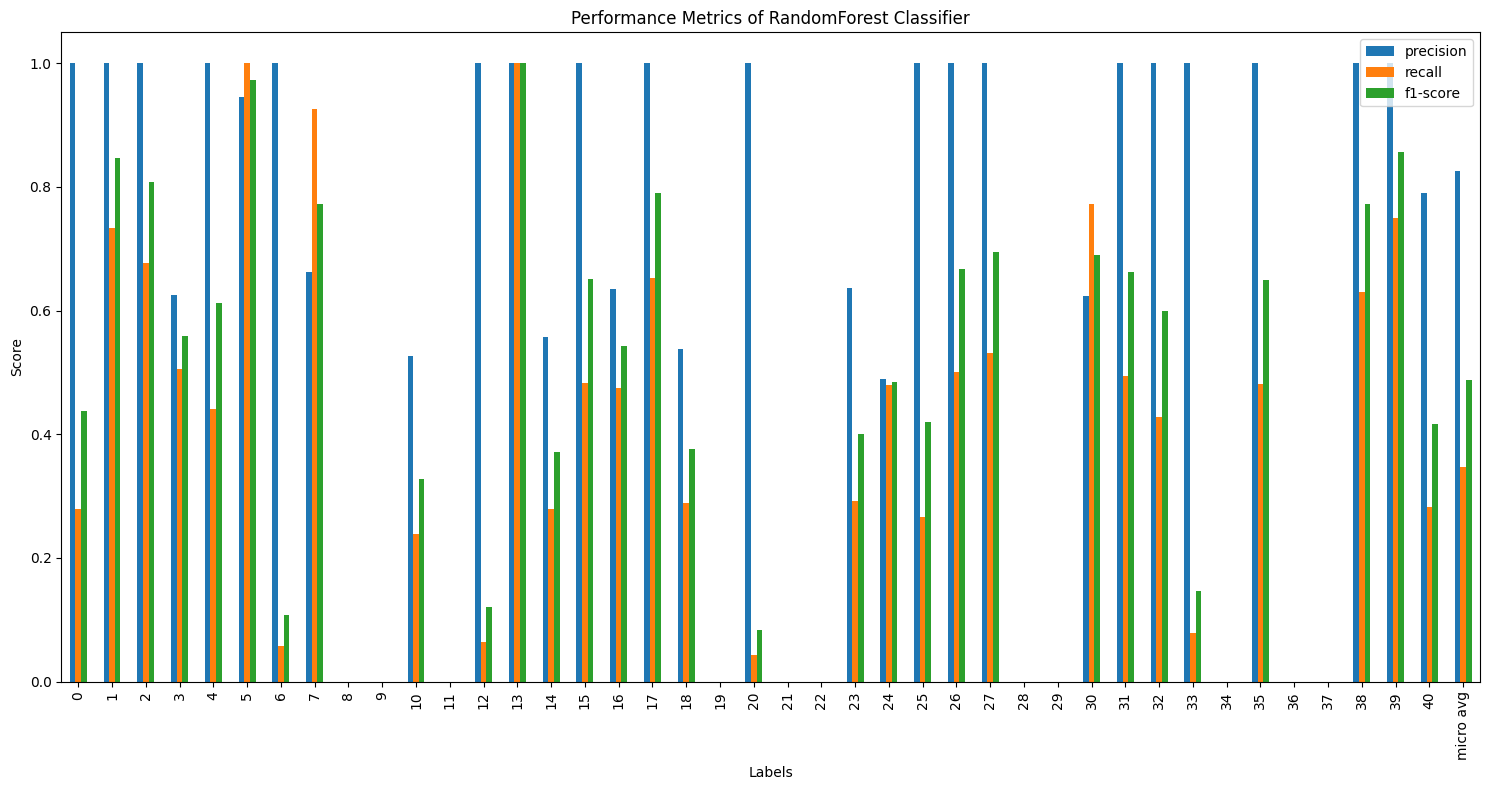

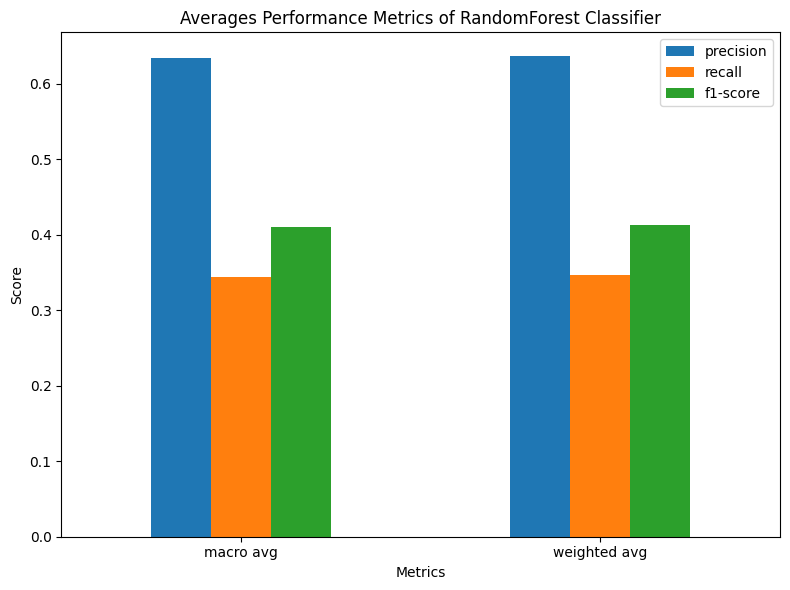

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Train the RandomForestClassifier on the original target labels
rc = RandomForestClassifier(random_state=42)
rc.fit(X_train, y_train)

# Make predictions
y_pred = rc.predict(X_test)

# Print classification report
print("Classification Report")
report = classification_report(y_test, y_pred, output_dict=True)
print(report)

# Convert the classification report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Select only a subset of metrics to display for better readability
metrics_to_display = ['precision', 'recall', 'f1-score']
df_report_subset = df_report.loc[df_report.index[:-3], metrics_to_display]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Plot the subset of metrics
ax = df_report_subset.plot(kind='bar', figsize=(15, 8))
plt.title('Performance Metrics of RandomForest Classifier')
plt.xlabel('Labels')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Optionally, plot the macro and weighted averages separately
df_averages = df_report.loc[['macro avg', 'weighted avg'], metrics_to_display]
ax = df_averages.plot(kind='bar', figsize=(8, 6))
plt.title('Averages Performance Metrics of RandomForest Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [24]:
from sklearn.metrics import confusion_matrix

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

 #Plot the confusion matrix
#conf_matrix = confusion_matrix(y_test, y_pred)
#plt.figure(figsize=(10, 8))
#sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
#plt.title('Confusion Matrix')
#plt.xlabel('Predicted')
#plt.ylabel('Actual')
#plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.28      0.44        93
           1       1.00      0.73      0.85       105
           2       1.00      0.68      0.81        96
           3       0.62      0.51      0.56        99
           4       1.00      0.44      0.61        84
           5       0.95      1.00      0.97       105
           6       1.00      0.06      0.11        88
           7       0.66      0.93      0.77        95
           8       0.00      0.00      0.00        98
           9       0.00      0.00      0.00        88
          10       0.53      0.24      0.33        84
          11       0.00      0.00      0.00        86
          12       1.00      0.06      0.12        93
          13       1.00      1.00      1.00        82
          14       0.56      0.28      0.37       104
          15       1.00      0.48      0.65        87
          16       0.64      0.47      0.54        99
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report
{'0': {'precision': 1.0, 'recall': 0.27956989247311825, 'f1-score': 0.43697478991596633, 'support': 93}, '1': {'precision': 1.0, 'recall': 0.7333333333333333, 'f1-score': 0.846153846153846, 'support': 105}, '2': {'precision': 1.0, 'recall': 0.6770833333333334, 'f1-score': 0.8074534161490683, 'support': 96}, '3': {'precision': 0.625, 'recall': 0.5050505050505051, 'f1-score': 0.5586592178770949, 'support': 99}, '4': {'precision': 1.0, 'recall': 0.44047619047619047, 'f1-score': 0.6115702479338843, 'support': 84}, '5': {'precision': 0.9459459459459459, 'recall': 1.0, 'f1-score': 0.9722222222222222, 'support': 105}, '6': {'precision': 1.0, 'recall': 0.056818181818181816, 'f1-score': 0.1075268817204301, 'support': 88}, '7': {'precision': 0.6616541353383458, 'recall': 0.9263157894736842, 'f1-score': 0.7719298245614035, 'support': 95}, '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 98}, '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support':

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


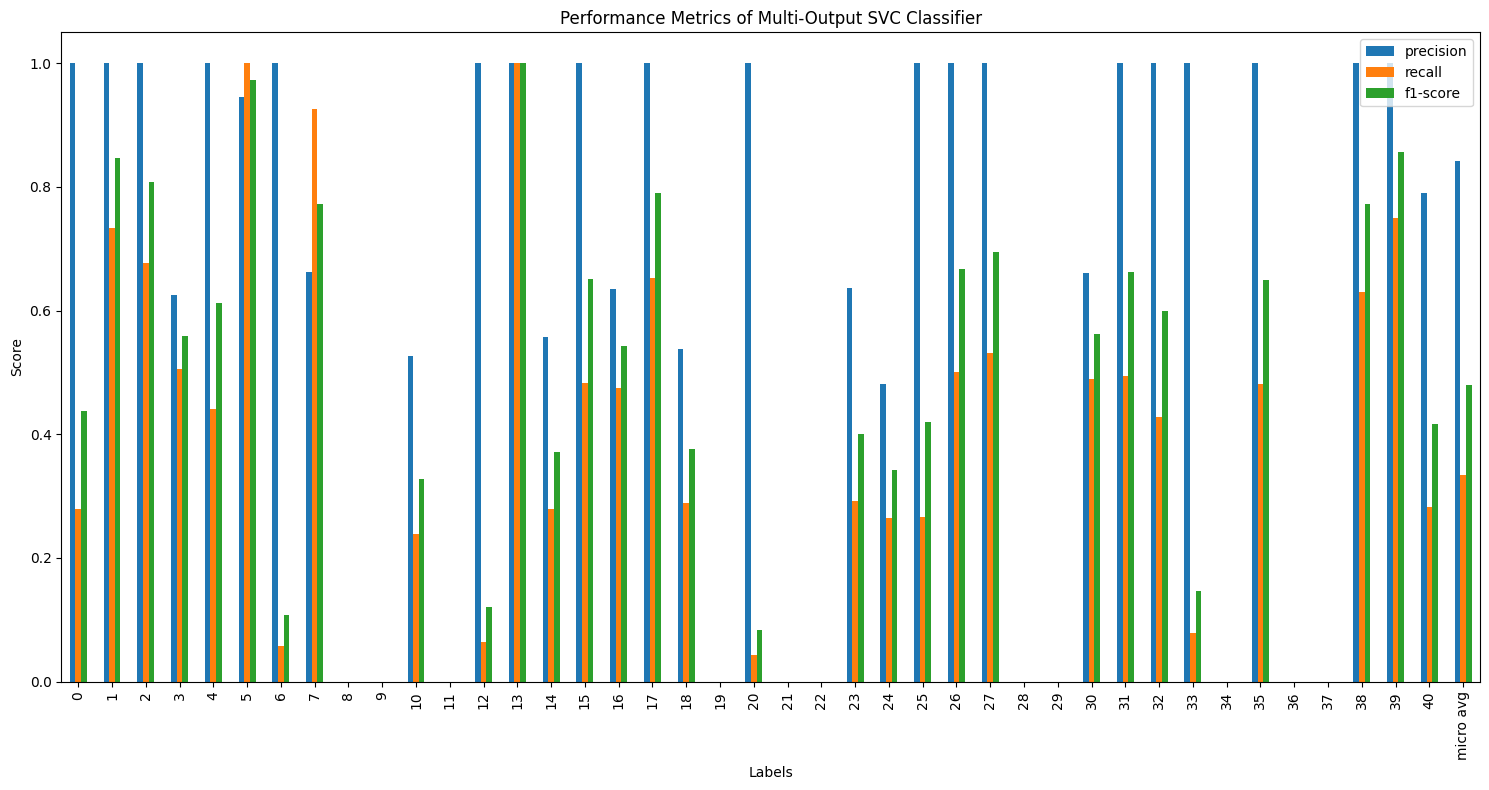

In [25]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Train a MultiOutputClassifier with SVC as the base estimator
multi_target_svc = MultiOutputClassifier(SVC(random_state=42))

# Fit the model
multi_target_svc.fit(X_train, y_train)

# Make predictions
y_pred = multi_target_svc.predict(X_test)

# Print classification report
print("Classification Report")
report = classification_report(y_test, y_pred, output_dict=True)  # Use output_dict=True to get a dictionary
print(report)

# Convert the classification report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Select only a subset of metrics to display for better readability
metrics_to_display = ['precision', 'recall', 'f1-score']
df_report_subset = df_report.loc[df_report.index[:-3], metrics_to_display]  # Exclude 'support'

# Plot the subset of metrics
ax = df_report_subset.plot(kind='bar', figsize=(15, 8))
plt.title('Performance Metrics of Multi-Output SVC Classifier')
plt.xlabel('Labels')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


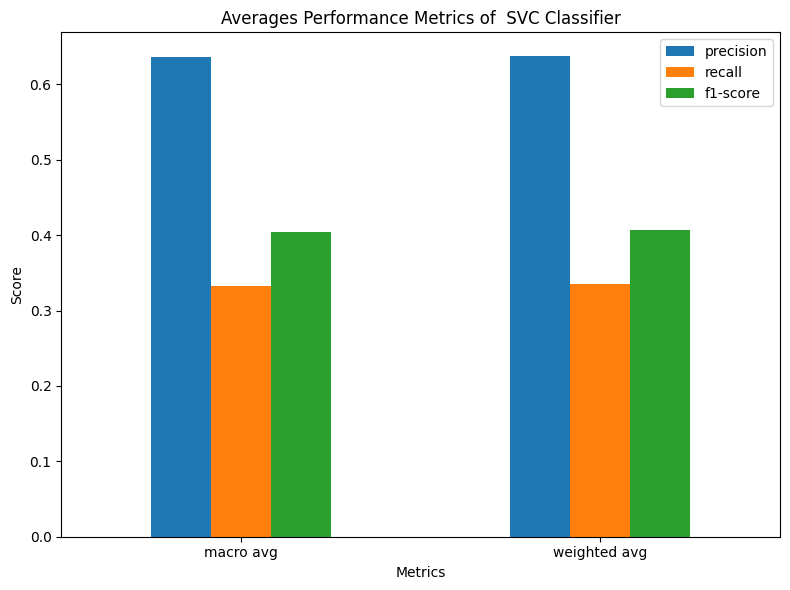

In [26]:
# Optionally, plot the macro and weighted averages separately
df_averages = df_report.loc[['macro avg', 'weighted avg'], metrics_to_display]
ax = df_averages.plot(kind='bar', figsize=(8, 6))
plt.title('Averages Performance Metrics of  SVC Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

acc = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoder[train_index], y_encoder[test_index]

    rc.fit(X_train, y_train)

    y_pred = rc.predict(X_test)

    accuracy = accuracy_score(y_pred, y_test)
    acc.append(accuracy)

print("Average Accuracy: ", np.mean(acc))

Average Accuracy:  0.33648373983739843


# **Using Training.csv data**

In [28]:
df = pd.read_csv("/content/Training.csv")

df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [29]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

<ipython-input-30-871c7f3d0ce5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Disease', data=disease_counts_df, palette='viridis')


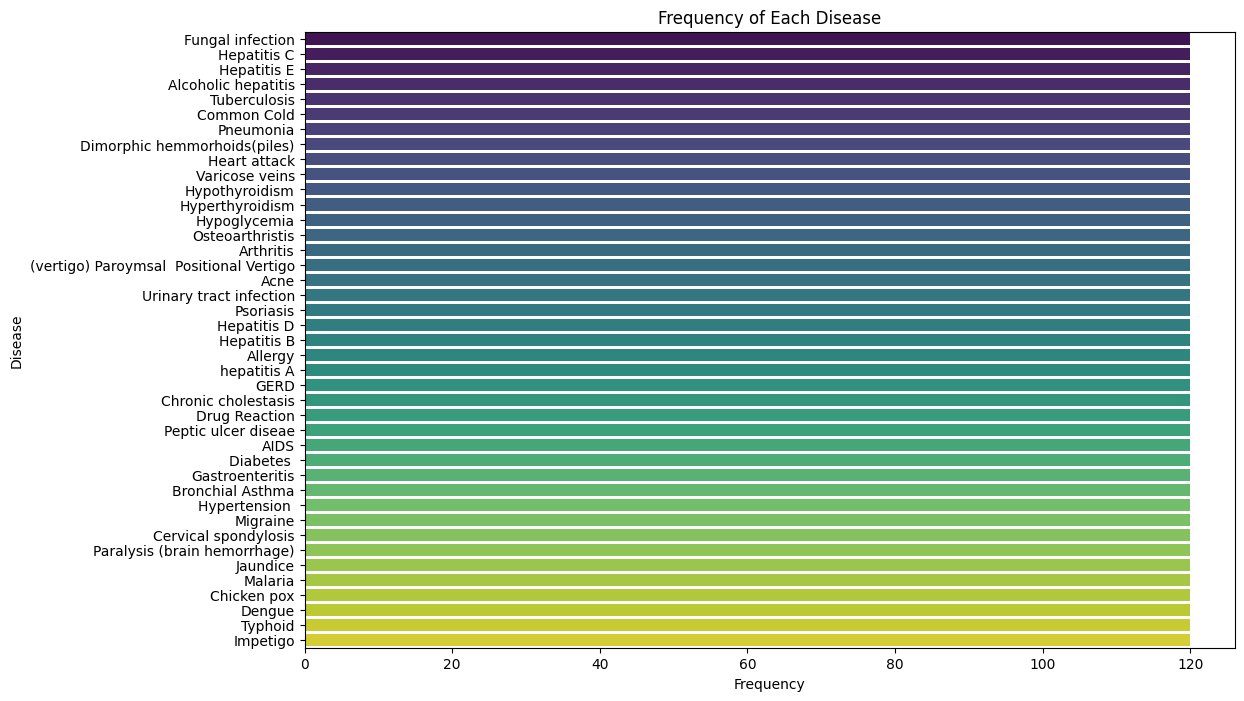

In [30]:
# Assuming your DataFrame is named df and the target column is 'prognosis'
disease_counts = df['prognosis'].value_counts()

# Convert to DataFrame for easier plotting
disease_counts_df = disease_counts.reset_index()
disease_counts_df.columns = ['Disease', 'Frequency']

# Plotting the frequency of each disease
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Disease', data=disease_counts_df, palette='viridis')
plt.title('Frequency of Each Disease')
plt.xlabel('Frequency')
plt.ylabel('Disease')
plt.show()

In [31]:
# Instantiate the encoder
encoder = OneHotEncoder(sparse_output=False, categories='auto')

# Fit and transform the 'prognosis' column
y_encoder = encoder.fit_transform(df[['prognosis']])

In [32]:
X = df.drop('prognosis', axis = 1)

In [33]:
X_train,X_test, y_train, y_test = train_test_split(X, y_encoder, test_size = 0.2, random_state = 42)

print(f"X_train = {X_train.shape}")
print(f"X_test = {X_test.shape}")
print(f"y_train = {y_train.shape}")
print(f"y_test = {y_test.shape}")

X_train = (3936, 132)
X_test = (984, 132)
y_train = (3936, 41)
y_test = (984, 41)


Random Forest

Classification Report
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 33}, '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23}, '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 21}, '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 15}, '10': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23}, '11': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 26}, '12': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 21}, '13': {'precision': 1.0, 'recall': 1.0

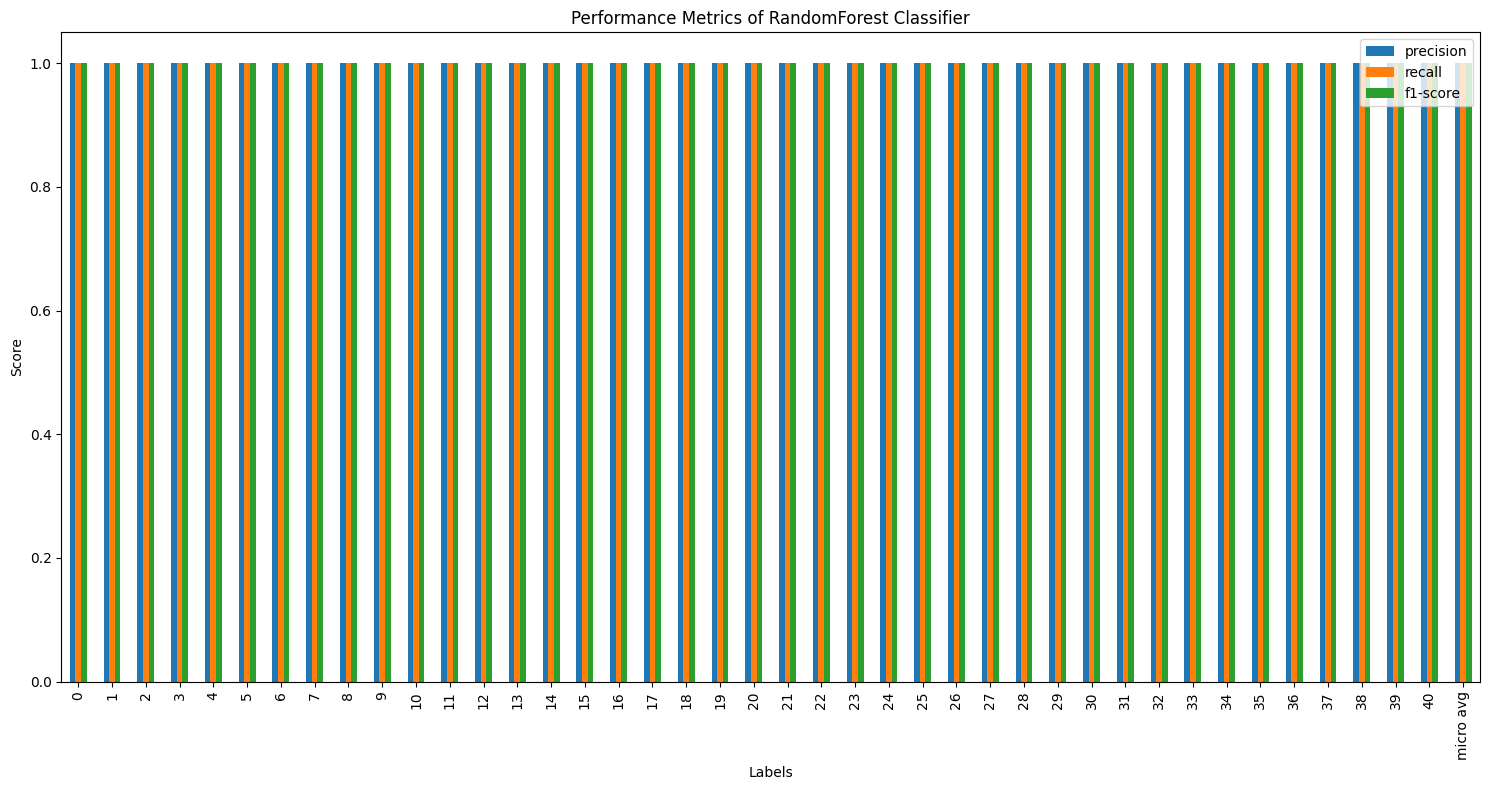

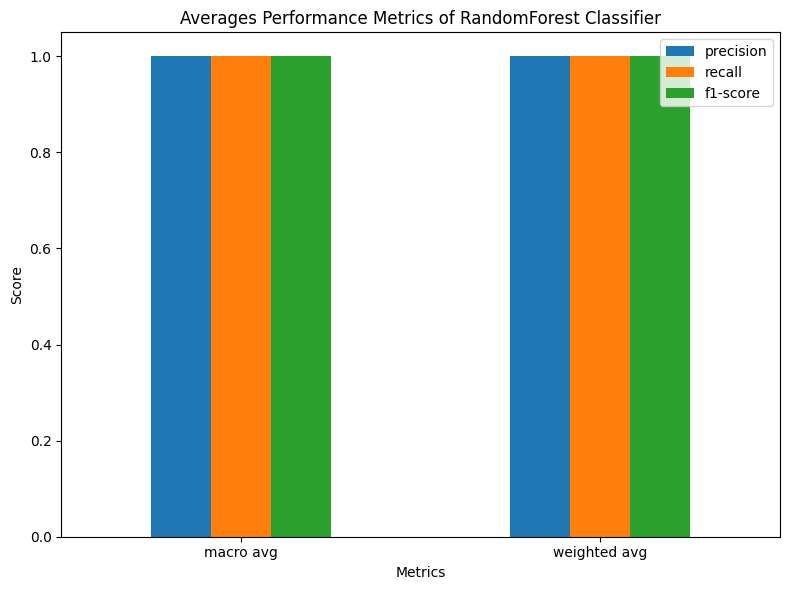

              precision  recall  f1-score  support
0                   1.0     1.0       1.0     18.0
1                   1.0     1.0       1.0     30.0
2                   1.0     1.0       1.0     24.0
3                   1.0     1.0       1.0     25.0
4                   1.0     1.0       1.0     24.0
5                   1.0     1.0       1.0     23.0
6                   1.0     1.0       1.0     33.0
7                   1.0     1.0       1.0     23.0
8                   1.0     1.0       1.0     21.0
9                   1.0     1.0       1.0     15.0
10                  1.0     1.0       1.0     23.0
11                  1.0     1.0       1.0     26.0
12                  1.0     1.0       1.0     21.0
13                  1.0     1.0       1.0     29.0
14                  1.0     1.0       1.0     24.0
15                  1.0     1.0       1.0     19.0
16                  1.0     1.0       1.0     28.0
17                  1.0     1.0       1.0     25.0
18                  1.0     1.0

In [34]:
# Train the RandomForestClassifier on the original target labels
rc = RandomForestClassifier(random_state=42)
rc.fit(X_train, y_train)

# Make predictions
y_pred = rc.predict(X_test)

# Print classification report
print("Classification Report")
report = classification_report(y_test, y_pred, output_dict=True)
print(report)

# Convert the classification report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Select only a subset of metrics to display for better readability
metrics_to_display = ['precision', 'recall', 'f1-score']
df_report_subset = df_report.loc[df_report.index[:-3], metrics_to_display]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Plot the subset of metrics
ax = df_report_subset.plot(kind='bar', figsize=(15, 8))
plt.title('Performance Metrics of RandomForest Classifier')
plt.xlabel('Labels')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Optionally, plot the macro and weighted averages separately
df_averages = df_report.loc[['macro avg', 'weighted avg'], metrics_to_display]
ax = df_averages.plot(kind='bar', figsize=(8, 6))
plt.title('Averages Performance Metrics of RandomForest Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
from sklearn.metrics import classification_report
# Display the classification report table
print(df_report)


Classification Report
{'(vertigo) Paroymsal  Positional Vertigo': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, 'AIDS': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30}, 'Acne': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24}, 'Alcoholic hepatitis': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25}, 'Allergy': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24}, 'Arthritis': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23}, 'Bronchial Asthma': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 33}, 'Cervical spondylosis': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23}, 'Chicken pox': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 21}, 'Chronic cholestasis': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 15}, 'Common Cold': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23}, 'Dengue': {'precision': 1.0, 'recall'

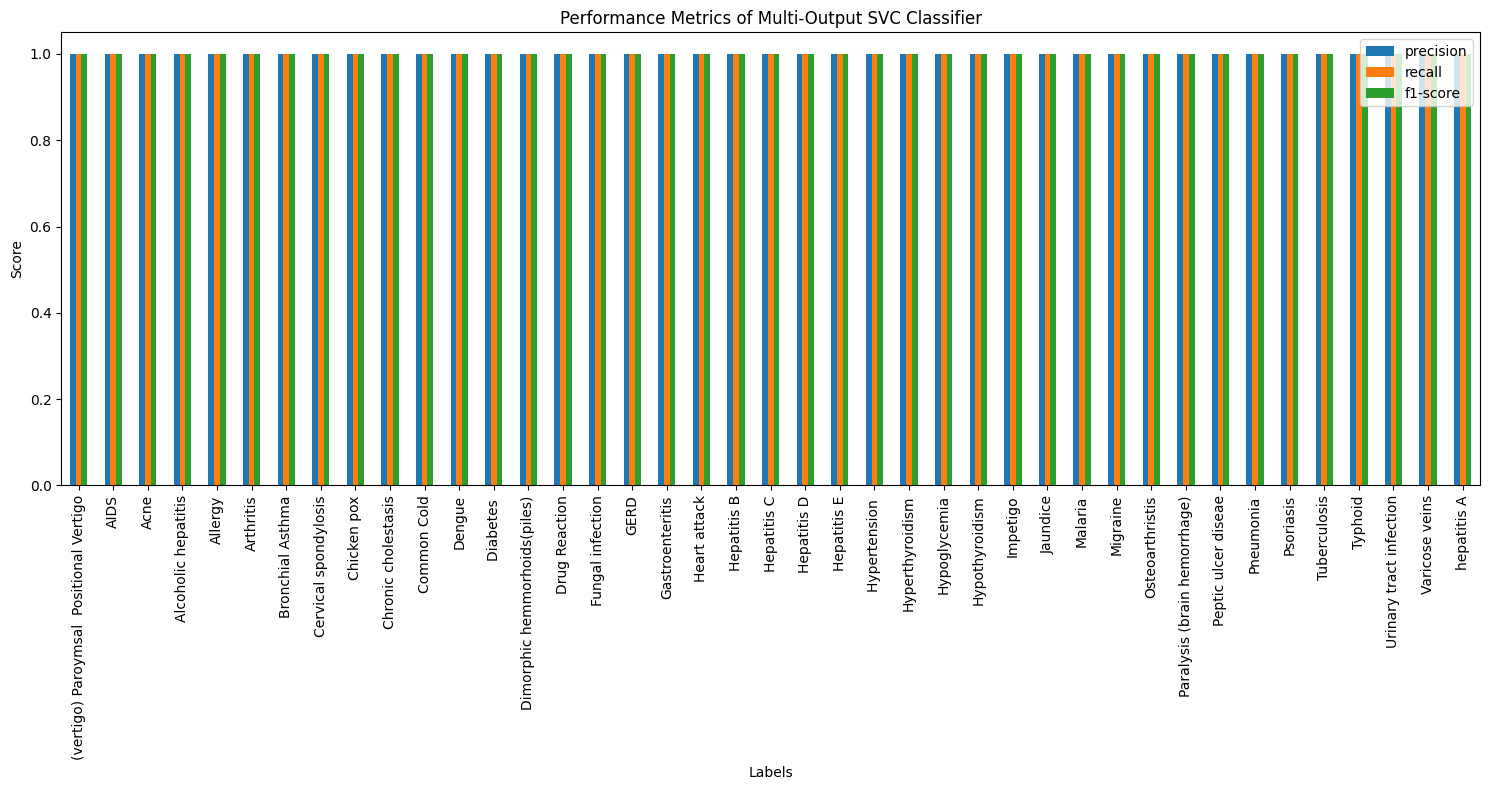

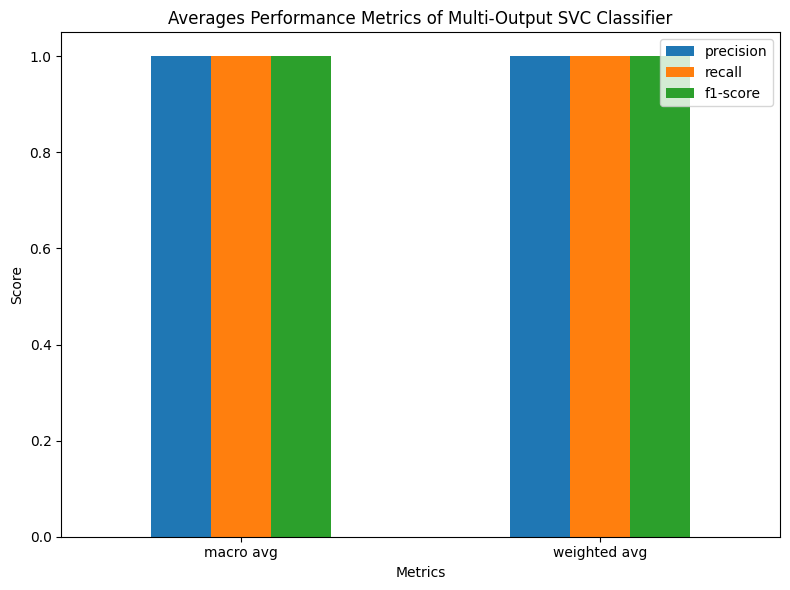

                                         precision  recall  f1-score  support
(vertigo) Paroymsal  Positional Vertigo        1.0     1.0       1.0     18.0
AIDS                                           1.0     1.0       1.0     30.0
Acne                                           1.0     1.0       1.0     24.0
Alcoholic hepatitis                            1.0     1.0       1.0     25.0
Allergy                                        1.0     1.0       1.0     24.0
Arthritis                                      1.0     1.0       1.0     23.0
Bronchial Asthma                               1.0     1.0       1.0     33.0
Cervical spondylosis                           1.0     1.0       1.0     23.0
Chicken pox                                    1.0     1.0       1.0     21.0
Chronic cholestasis                            1.0     1.0       1.0     15.0
Common Cold                                    1.0     1.0       1.0     23.0
Dengue                                         1.0     1.0      

In [35]:
# Assuming df1 is already defined
X = df.drop(columns=['prognosis'])
y = df['prognosis']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y_train and y_test are multi-label (for demonstration, we'll simulate this)
# In practice, y should already be multi-label if this is a multi-label problem
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

# Train a MultiOutputClassifier with SVC as the base estimator
multi_target_svc = MultiOutputClassifier(SVC(random_state=42))

# Fit the model
multi_target_svc.fit(X_train, y_train)

# Make predictions
y_pred = multi_target_svc.predict(X_test)

# Print classification report
print("Classification Report")
report = classification_report(y_test, y_pred, output_dict=True)
print(report)

# Convert the classification report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Select only a subset of metrics to display for better readability
metrics_to_display = ['precision', 'recall', 'f1-score']
df_report_subset = df_report.loc[df_report.index[:-3], metrics_to_display]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Plot the subset of metrics
ax = df_report_subset.plot(kind='bar', figsize=(15, 8))
plt.title('Performance Metrics of Multi-Output SVC Classifier')
plt.xlabel('Labels')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Optionally, plot the macro and weighted averages separately
df_averages = df_report.loc[['macro avg', 'weighted avg'], metrics_to_display]
ax = df_averages.plot(kind='bar', figsize=(8, 6))
plt.title('Averages Performance Metrics of Multi-Output SVC Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
from sklearn.metrics import classification_report
# Display the classification report table
print(df_report)



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Classification Report
{'(vertigo) Paroymsal  Positional Vertigo': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18}, 'AIDS': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30}, 'Acne': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24}, 'Alcoholic hepatitis': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25}, 'Allergy': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24}, 'Arthritis': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23}, 'Bronchial Asthma': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 33}, 'Cervical spondylosis': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23}, 'Chicken pox': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 21}, 'Chronic cholestasis': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 15}, 'Common Cold': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23}, 'Dengue': {'precision': 1.0, 'recall'

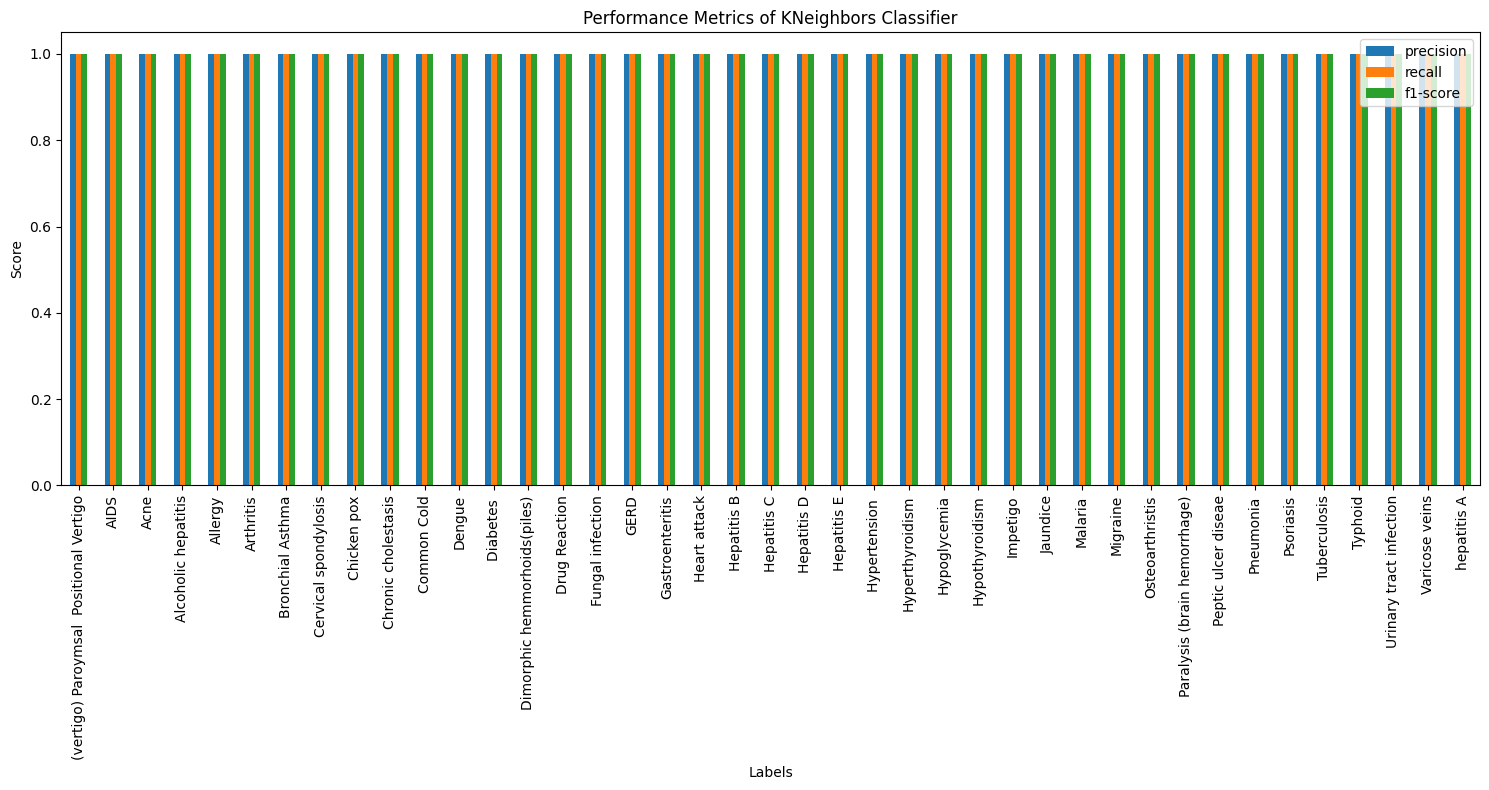

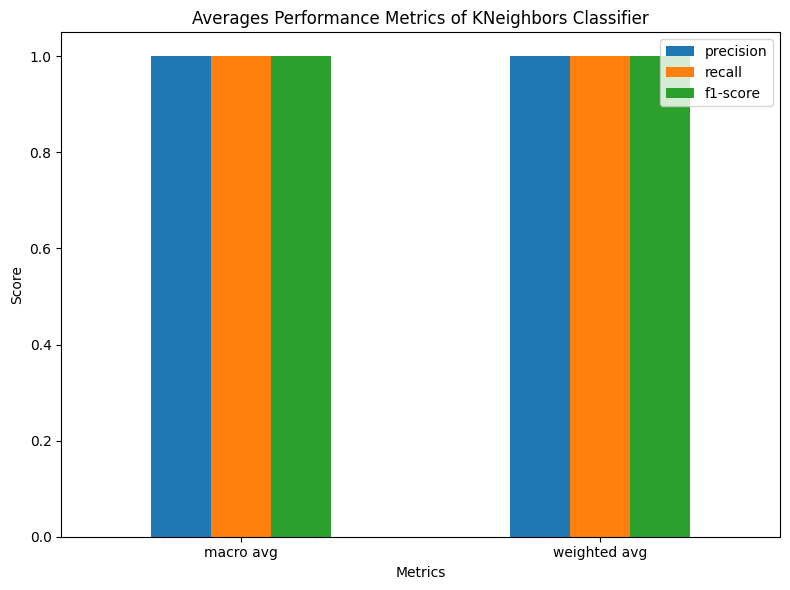

                                         precision  recall  f1-score  support
(vertigo) Paroymsal  Positional Vertigo        1.0     1.0       1.0     18.0
AIDS                                           1.0     1.0       1.0     30.0
Acne                                           1.0     1.0       1.0     24.0
Alcoholic hepatitis                            1.0     1.0       1.0     25.0
Allergy                                        1.0     1.0       1.0     24.0
Arthritis                                      1.0     1.0       1.0     23.0
Bronchial Asthma                               1.0     1.0       1.0     33.0
Cervical spondylosis                           1.0     1.0       1.0     23.0
Chicken pox                                    1.0     1.0       1.0     21.0
Chronic cholestasis                            1.0     1.0       1.0     15.0
Common Cold                                    1.0     1.0       1.0     23.0
Dengue                                         1.0     1.0      

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Print classification report
print("Classification Report")
report = classification_report(y_test, y_pred, output_dict=True)
print(report)

# Convert the classification report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Select only a subset of metrics to display for better readability
metrics_to_display = ['precision', 'recall', 'f1-score']
df_report_subset = df_report.loc[df_report.index[:-3], metrics_to_display]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Plot the subset of metrics
ax = df_report_subset.plot(kind='bar', figsize=(15, 8))
plt.title('Performance Metrics of KNeighbors Classifier')
plt.xlabel('Labels')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Optionally, plot the macro and weighted averages separately
df_averages = df_report.loc[['macro avg', 'weighted avg'], metrics_to_display]
ax = df_averages.plot(kind='bar', figsize=(8, 6))
plt.title('Averages Performance Metrics of KNeighbors Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
from sklearn.metrics import classification_report
# Display the classification report table
print(df_report)



In [37]:
!pip install scikit-learn

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)

acc = []

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the KNN classifier
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test)
    acc.append(accuracy)

print("Average Accuracy = ", np.mean(acc))


Average Accuracy =  1.0


In [39]:

kf = KFold(n_splits = 10,shuffle = True, random_state = 42)

acc = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  rc.fit(X_train, y_train)

  y_pred = rc.predict(X_test)

  accuracy = accuracy_score(y_pred, y_test)
  acc.append(accuracy)

print("Average Accuracy = ", np.mean(acc))

Average Accuracy =  1.0


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

# Define the k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Ensure y_train and y_test have two dimensions
y_train = np.array(y_train).reshape(-1, 1)  # Assuming y_train is a DataFrame
y_test = np.array(y_test).reshape(-1, 1)  # Assuming y_test is a DataFrame

# Initialize the MultiOutputClassifier with SVC
multi_target_svc = MultiOutputClassifier(SVC(random_state=42))

# Perform k-fold cross-validation and get the scores
cv_scores = cross_val_score(multi_target_svc, X_train, y_train, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean Accuracy: {cv_scores.mean()}")

# Optionally, you can use these scores for further analysis or plotting


Cross-Validation Scores:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


## **neural network architecture**

In [41]:
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [42]:
!pip uninstall torch torchvision torchaudio -y
!pip install torch torchvision torchaudio


Found existing installation: torch 2.3.0+cu121
Uninstalling torch-2.3.0+cu121:
  Successfully uninstalled torch-2.3.0+cu121
Found existing installation: torchvision 0.18.0+cu121
Uninstalling torchvision-0.18.0+cu121:
  Successfully uninstalled torchvision-0.18.0+cu121
Found existing installation: torchaudio 2.3.0+cu121
Uninstalling torchaudio-2.3.0+cu121:
  Successfully uninstalled torchaudio-2.3.0+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.3.0
    Uninstalling triton-2.3.0:
      Successfully uninstalled triton-2.3.0


In [43]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# Assuming you have already loaded and preprocessed your data into X and y

# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create TensorDataset objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:

# Define the neural network model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(132, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 41)  # Output layer matches encoded target size

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return torch.softmax(x, dim=1)

# Instantiate the neural network model
model = NeuralNetwork()

# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training the network
num_epochs = 1000
batch_size = 200
for epoch in range(num_epochs):
    dataset = TensorDataset(X_train_tensor, y_train_tensor)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    for index, batch in enumerate(data_loader):
        batch_data, batch_labels = batch
        optimizer.zero_grad()
        outputs = model(batch_data)
        loss = loss_function(outputs, torch.max(batch_labels, 1)[1])  # Take max index as label
        loss.backward()
        optimizer.step()

        if index % 10 == 0:
            print(f'Batch {index}th/Epoch {epoch}th => Loss: {loss.item():.4f}')

# Calculate training accuracy
with torch.no_grad():
    outputs_train = model(X_train_tensor)
    _, predicted_train = torch.max(outputs_train, 1)
    train_accuracy = (predicted_train == torch.max(y_train_tensor, 1)[1]).float().mean()
    print(f"Training Accuracy: {train_accuracy.item() * 100:.2f}%")

# Calculate test accuracy
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    test_accuracy = (predicted == torch.max(y_test_tensor, 1)[1]).float().mean()
    print(f"Test Accuracy: {test_accuracy.item() * 100:.2f}%")


Batch 0th/Epoch 0th => Loss: 3.7134
Batch 10th/Epoch 0th => Loss: 3.7137
Batch 0th/Epoch 1th => Loss: 3.7136
Batch 10th/Epoch 1th => Loss: 3.7133
Batch 0th/Epoch 2th => Loss: 3.7135
Batch 10th/Epoch 2th => Loss: 3.7135
Batch 0th/Epoch 3th => Loss: 3.7135
Batch 10th/Epoch 3th => Loss: 3.7136
Batch 0th/Epoch 4th => Loss: 3.7135
Batch 10th/Epoch 4th => Loss: 3.7135
Batch 0th/Epoch 5th => Loss: 3.7136
Batch 10th/Epoch 5th => Loss: 3.7136
Batch 0th/Epoch 6th => Loss: 3.7135
Batch 10th/Epoch 6th => Loss: 3.7135
Batch 0th/Epoch 7th => Loss: 3.7135
Batch 10th/Epoch 7th => Loss: 3.7135
Batch 0th/Epoch 8th => Loss: 3.7136
Batch 10th/Epoch 8th => Loss: 3.7136
Batch 0th/Epoch 9th => Loss: 3.7135
Batch 10th/Epoch 9th => Loss: 3.7135
Batch 0th/Epoch 10th => Loss: 3.7137
Batch 10th/Epoch 10th => Loss: 3.7134
Batch 0th/Epoch 11th => Loss: 3.7137
Batch 10th/Epoch 11th => Loss: 3.7135
Batch 0th/Epoch 12th => Loss: 3.7135
Batch 10th/Epoch 12th => Loss: 3.7136
Batch 0th/Epoch 13th => Loss: 3.7135
Batch 10

## **perform Grid search technique to find the best parameter**

In [47]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoder, test_size=0.2, random_state=42)
# Convert y_train and y_test to 1d arrays
y_train = y_train.argmax(axis=1)
y_test = y_test.argmax(axis=1)
# Instantiate the SVM model
model_SVM = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear'],
    'degree': [2, 3, 4, 5]
}

# Perform GridSearchCV
gridsearch = GridSearchCV(estimator=model_SVM, param_grid=param_grid)
gridsearch.fit(X_train, y_train)

# Get the best parameters
best_params = gridsearch.best_params_
print(f"Best parameters found: {best_params}")


Best parameters found: {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}


In [48]:
# Evaluate the model with the best parameters
best_model = gridsearch.best_estimator_
y_pred = best_model.predict(X_test)

# Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00 

In [49]:
import joblib

# Train the RandomForestClassifier on the original target labels
rc = RandomForestClassifier(random_state=42)
rc.fit(X_train, y_train)

# Save the trained model
joblib.dump(rc, 'random_forest_model.pkl')


['random_forest_model.pkl']